In [2]:
# libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder

pd.set_option('display.max_columns', None)

sns.set_theme(style="ticks")

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# loading dataset
data_root = pd.read_csv('/content/drive/MyDrive/Alura/dados/data_cleaned.csv', index_col = [0])

# shape
print(f'Formato do arquivo: {data_root.shape[0]} linhas e {data_root.shape[1]} colunas')

# checking dataset
data_root.head()

Formato do arquivo: 7043 linhas e 21 colunas


,id,churn,genero,idoso,parceiro,dependente,permanencia,servico_telefonico,multiplas_linhas,servico_internet,seguranca_online,backup_online,protecao_dispositivo,suporte_tecnico,tv_streaming,filme_streaming,contrato,conta_papel,metodo_pagamento,mensal,total
0,0002-ORFBO,No,Female,No,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30
1,0003-MKNFE,No,Male,No,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40
2,0004-TLHLJ,Yes,Male,No,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,Yes,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,Yes,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40


Irei fazer uma cópia do dataset original para não ter nenhum problema caso precise de uma informação original.

In [5]:
# making copy from data_root
data = data_root.copy()

In [6]:
# função para devolver alguns detalhes de cada coluna
def column_analysis(data, column, dataframe = True):
    if dataframe == False:
        print('-' * 25)
        print(f'Nome:          {column}')
        print(f'Cardinalidade: {data[column].nunique()}')
        print(f'Dados únicos:  {data[column].unique()}')
        print(f'Tipo:          {data[column].dtypes}')
    else:
        return (column, data[column].nunique(), str(data[column].unique()), data[column].isna().sum(), data[column].dtypes)

def show_values(axs, orient = "v", space = 0.01):
    def _single(ax):
        if orient == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + (p.get_height() * 0.01)
                value = '{:.1f}'.format(p.get_height())
                ax.text(_x, _y, value, ha = "center") 
        elif orient == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() - (p.get_height()*0.5)
                value = '{:.1f}'.format(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _single(ax)
    else:
        _single(axs)

def plot_bar(data, column):
    if column == 'genero':
        x_values = data[column].replace({0: 'Masculino', 1: 'Feminino'}).value_counts().sort_index().index
    else:
        x_values = data[column].replace({0: 'Não', 1: 'Sim'}).value_counts().sort_index().index
    y_values = data[column].value_counts(normalize = True).sort_index().values * 100
    p = sns.barplot(x = x_values, y = y_values, label = f'{column}')
    show_values(p)
    plt.title(f'Análise univariada - {column}', loc = 'left', fontsize = 14)
    plt.ylim(0, 100)
    plt.ylabel('Porcentagem (%)')

def plot_pie(data, column):
    plt.pie(data[column].value_counts(normalize = True).values, labels = data[column].replace(0, 'Nenhuma').value_counts().index, autopct = '%.2f' + '%%')
    plt.title(f'Análise univariada - {column}', loc = 'left', fontsize = 14)

def plot_hist(data, column):
    plt.hist(data[column], bins = 20)
    plt.title(f'Análise univariada - {column}', loc = 'left', fontsize = 14)
    plt.xlabel(f'{column}')
    plt.ylabel('Volumetria')

# def plot_catplot(data, column):
#     g = sns.catplot(x = column, hue = 'churn', kind = 'count', data = data, height = 8, aspect = 0.9)
#     g.fig.suptitle(f'Churn por {column}', fontsize = 14)
#     g.set_ylabels('Quantidade de churn')
#     g.set_xlabels(column)
#     g.despine(left = True)

def plot_catplot(data, column):
    x = column
    y = 'churn'
    data = data.groupby(x)[y].value_counts(normalize=True).mul(100).rename('percent').reset_index()

    g = sns.catplot(x = x, y = 'percent', hue = y, kind = 'bar', data = data, height = 8, aspect = 0.9)
    g.fig.suptitle(f'Churn por {column}', fontsize = 14)
    g.set_ylabels('Porcentagem (%)')
    g.set_xlabels(column)
    g.set(ylim = (0, 100))

Irei analisar novamente as colunas para fazer uma melhor separação dos dados, colocando as colunas com os dados de mesmo formato junto, facilitando a etapa de visualização.

In [7]:
# columns analysis
columns_descriptions = []

for column in data.columns:
    column_description = column_analysis(data, column)
    columns_descriptions.append(column_description)

pd.DataFrame(columns_descriptions, columns = ['nome', 'cardinalidade', 'dados_unicos', 'dados_nulos', 'tipo'])

,nome,cardinalidade,dados_unicos,dados_nulos,tipo
0,id,7043,['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9...,0,object
1,churn,2,['No' 'Yes'],0,object
2,genero,2,['Female' 'Male'],0,object
3,idoso,2,['No' 'Yes'],0,object
4,parceiro,2,['Yes' 'No'],0,object
5,dependente,2,['Yes' 'No'],0,object
6,permanencia,73,[ 9 4 13 3 71 63 7 65 54 72 5 56 34 1 45 ...,0,int64
7,servico_telefonico,2,['Yes' 'No'],0,object
8,multiplas_linhas,3,['No' 'Yes' 'No phone service'],0,object
9,servico_internet,3,['DSL' 'Fiber optic' 'No'],0,object


In [8]:
# setting columns groups
target_column = ['churn']
binary_columns = ['genero', 'idoso', 'parceiro', 'dependente', 'servico_telefonico', 'conta_papel']
continuous_columns = ['permanencia', 'mensal', 'total']
nominal_columns = ['servico_internet', 'contrato', 'metodo_pagamento', 'multiplas_linhas', 'seguranca_online', 'backup_online', 'protecao_dispositivo', 'suporte_tecnico', 'tv_streaming', 'filme_streaming']

### Análise Univariada

#### target_column

Verificando a distribuição da variável 'churn' que é a nossa variável target.

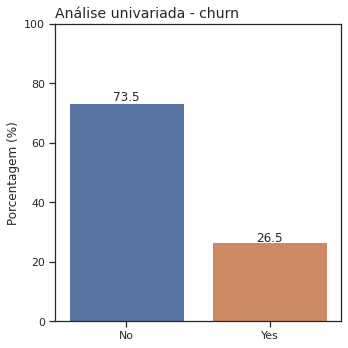

In [9]:
plt.figure(figsize = (5, 5))
for position, column in enumerate(target_column):
    plt.subplot(1, 1, position + 1)
    plot_bar(data, column)

plt.tight_layout()

A variável 'churn', que é a variável target, possui uma taxa de 26,5% de clientes que deixaram a base de dados, cerca de 1/4 da base. Isso nos mostra que ela está desbalanceada, sinalizando um alerta.

#### binary_columns

Criei um loop for para analisar as variáveis das colunas que contém valores 'Yes' e 'No'.

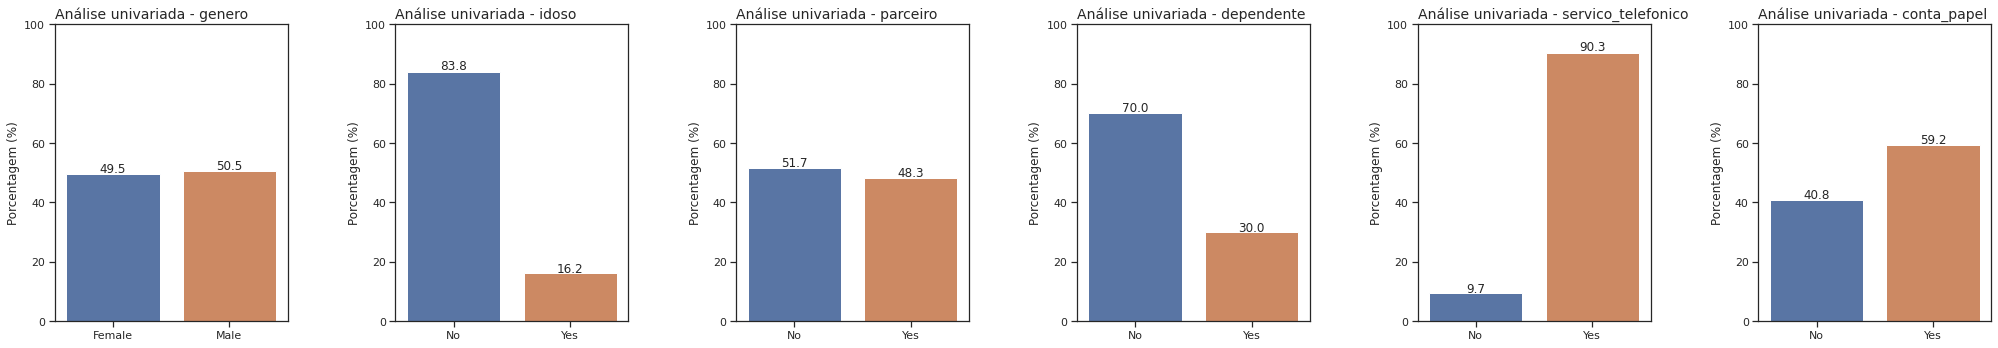

In [10]:
# 
plt.figure(figsize = (28, 5))
for position, column in enumerate(binary_columns):
    plt.subplot(1, 6, position + 1)
    plot_bar(data, column)

plt.tight_layout()

- **genero:** a base possui praticamente a mesma proporção de homens e mulheres;
- **idoso:** a maior parte de base é composta por jovens;
- **parceiro:** a base possui praticamente a mesma proporção de pessoas com parceiro e sem parceiro;
- **dependente:** a base possui cerca de 1/3 de possoas sem dependentes;
- **servico_telefonico:** a maior parte da base possui serviço telefonico.

#### continuous_columns

Criei um loop for para analisar as variáveis das colunas que contém valores contínuos.

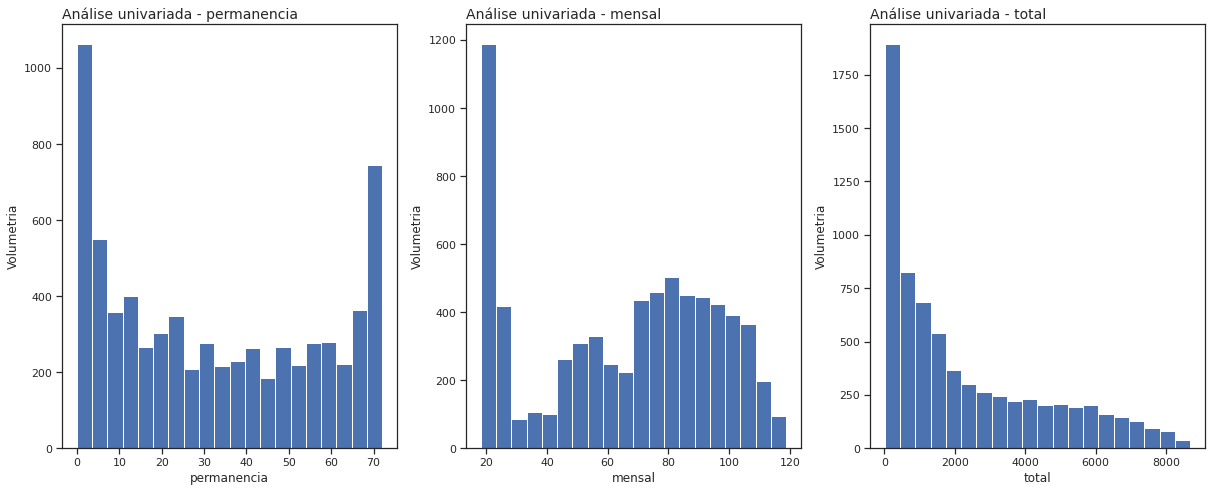

In [11]:
#
plt.figure(figsize = (17, 7))
for position, column in enumerate(continuous_columns):
    plt.subplot(1, 3, position + 1)
    plot_hist(data, column)

plt.tight_layout()
plt.show()

In [12]:
# sns.boxplot(x = 'permanencia', y = 'churn', hue = 'churn', data = data[continuous_columns + target_column])
# sns.despine(offset = 10, trim = True)

In [13]:
data[continuous_columns].describe().T

,count,mean,std,min,25%,50%,75%,max
permanencia,7043.0,32.371149,24.559481,0.00,9.00,29.00,55.00,72.00
mensal,7043.0,64.761692,30.090047,18.25,35.50,70.35,89.85,118.75
total,7043.0,2279.798992,2266.730170,18.80,398.55,1394.55,3786.60,8684.80


#### nominal_columns

Criei um loop for para analisar as variáveis das colunas que contém valores categoricos nominais.

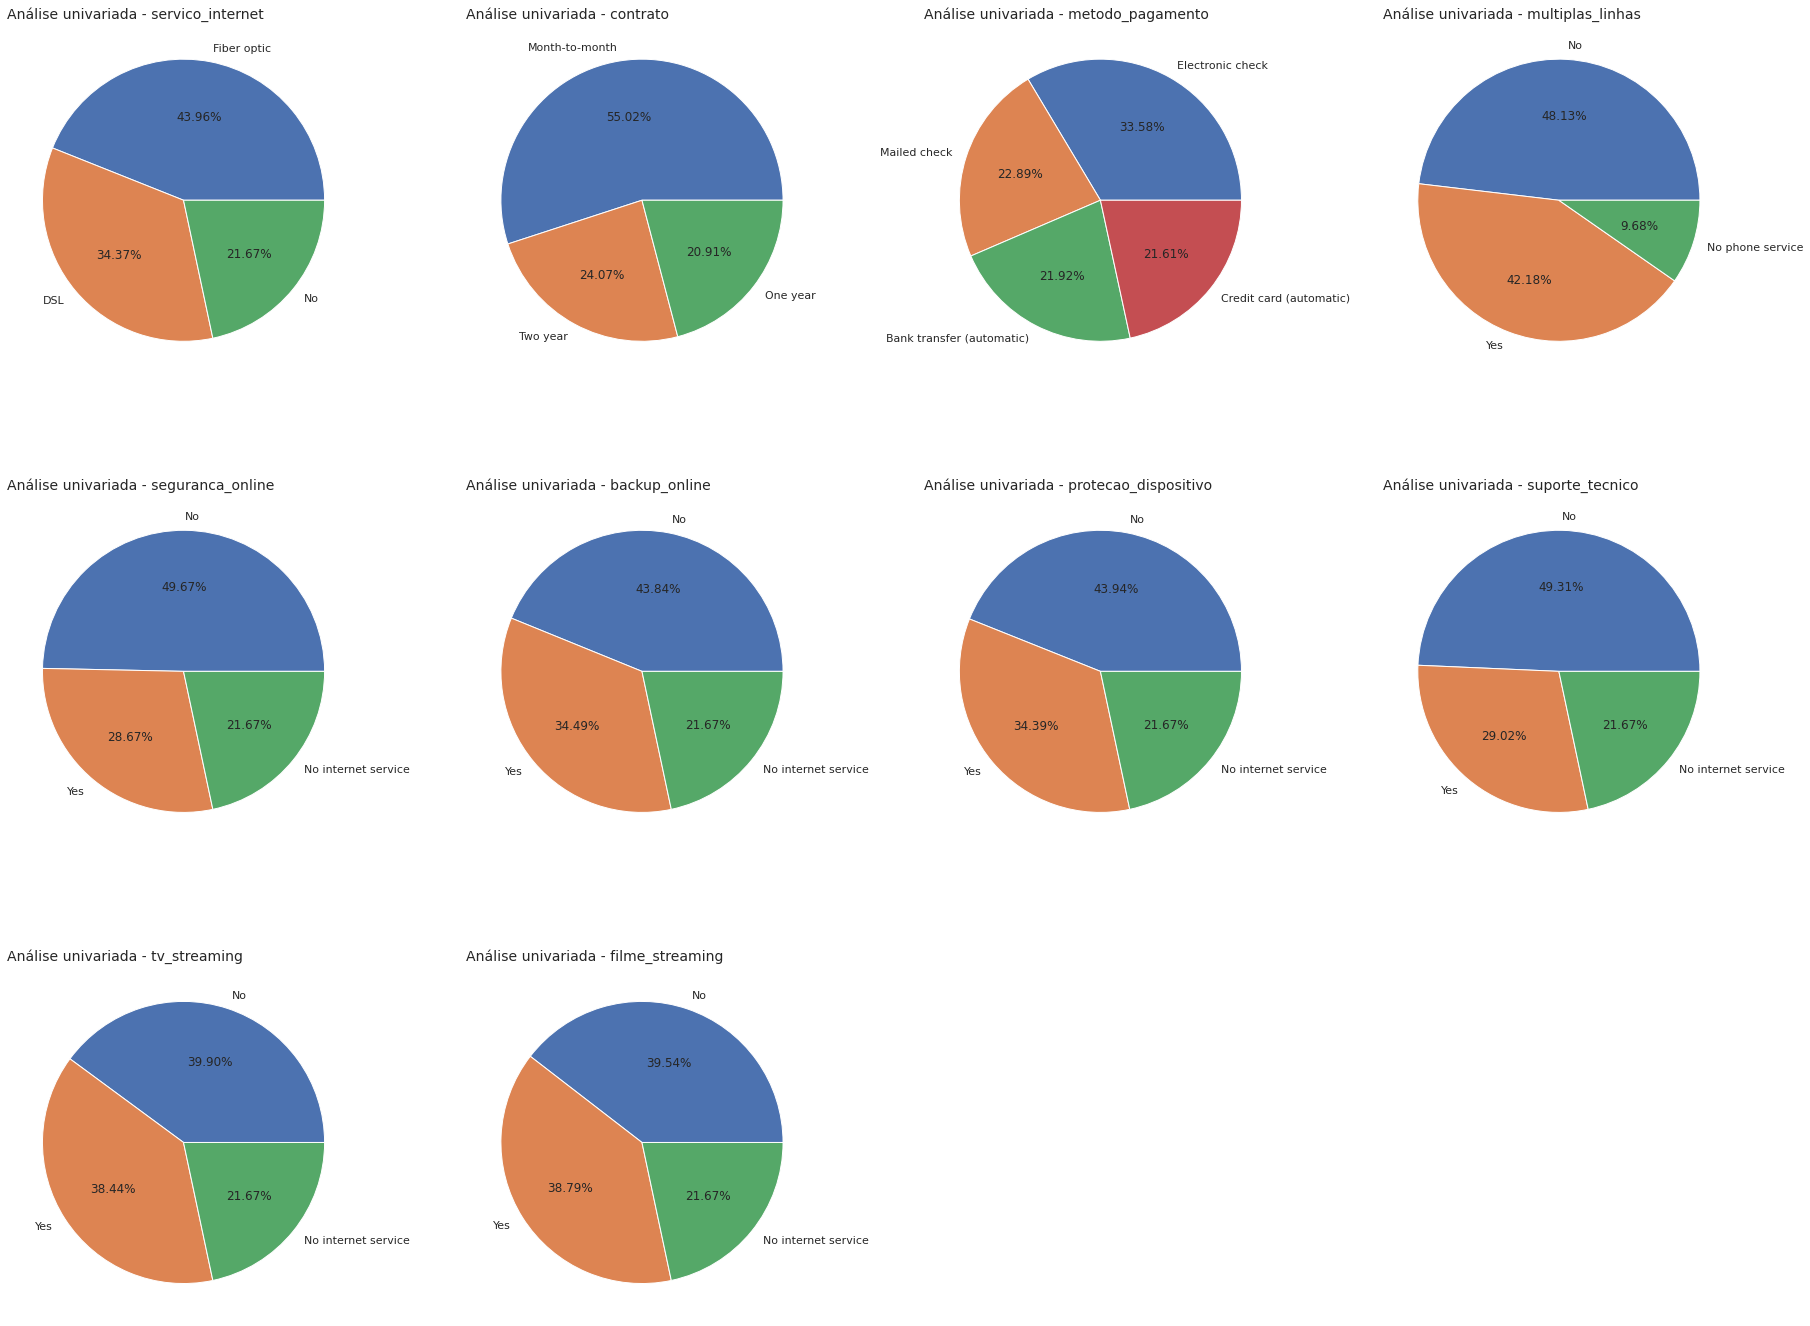

In [14]:
plt.figure(figsize = (30, 24))
for position, column in enumerate(nominal_columns):
    plt.subplot(3, 4, position + 1)
    plot_pie(data, column)

# plt.tight_layout()
# set the spacing between subplots
plt.subplots_adjust(left = 0.2, 
                    right = 1, 
                    wspace = 0.3, 
                    hspace = 0.3)
plt.show()

### Análise Bivariada

#### Churn vs Gênero

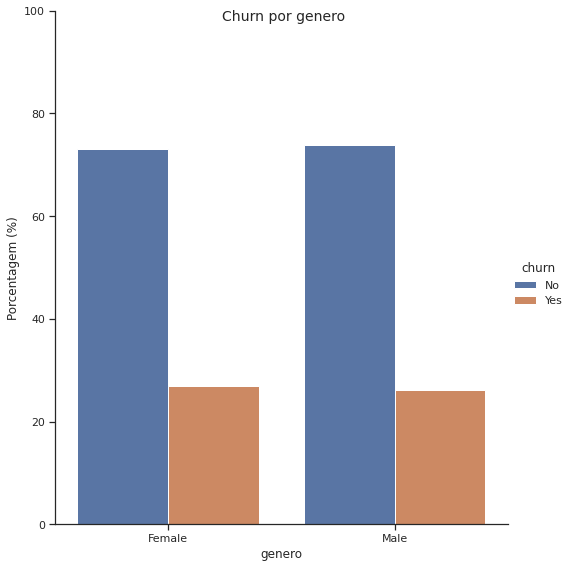

In [15]:
plot_catplot(data, 'genero')

A partir do gráfico acima, podemos verificar que a variável 'genero' não tem impacto na variável 'churn', uma vez que elas apresentam basicamente a mesma proporção de churn entre os sexos feminino e masculino.

#### Churn vs Idoso

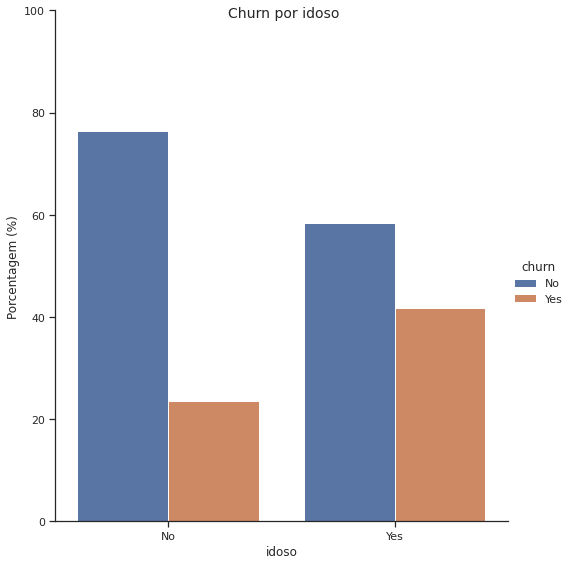

In [16]:
plot_catplot(data, 'idoso')

#### Churn vs Parceiro

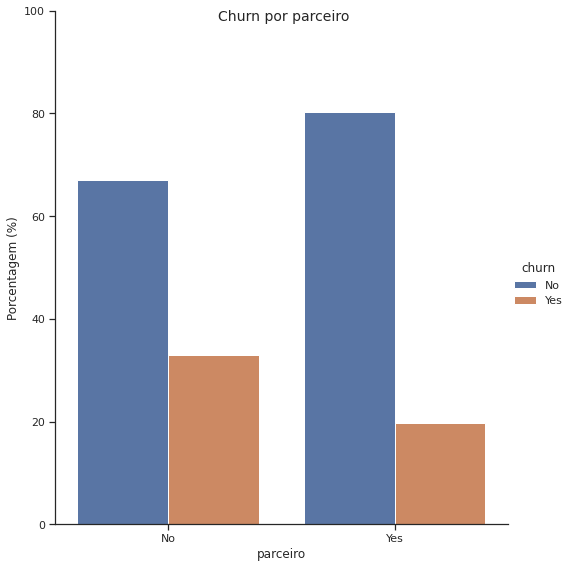

In [17]:
plot_catplot(data, 'parceiro')

#### Churn vs Dependente

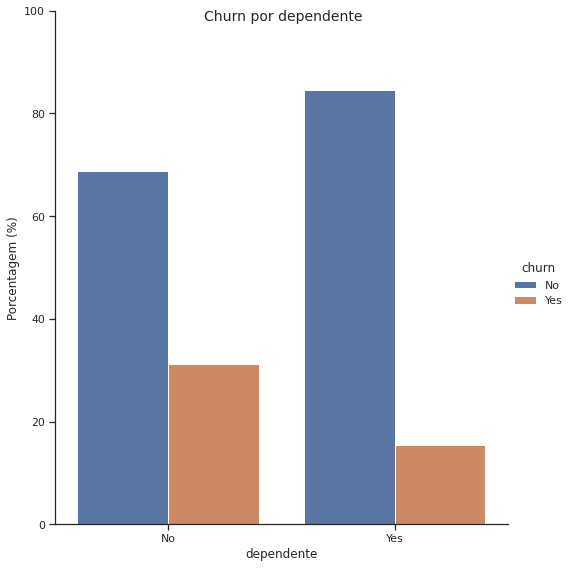

In [18]:
plot_catplot(data, 'dependente')

#### Churn vs Serviço Telefônico

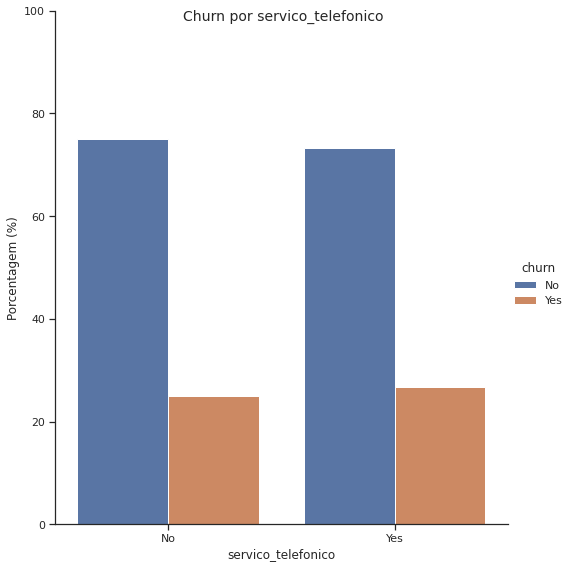

In [19]:
plot_catplot(data, 'servico_telefonico')

#### Churn vs Multiplas Linhas

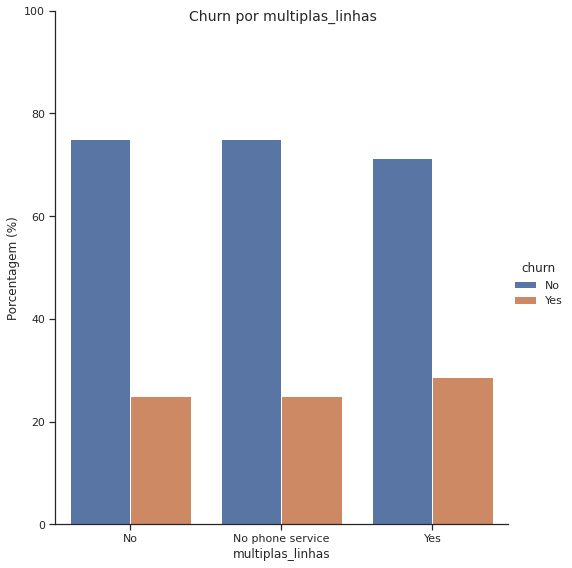

In [20]:
plot_catplot(data, 'multiplas_linhas')

#### Churn vs Serviço Internet

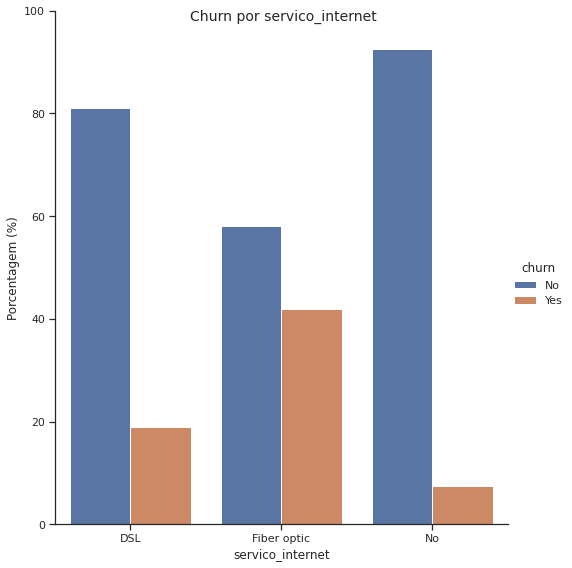

In [21]:
plot_catplot(data, 'servico_internet')

#### Churn vs Serviços Online

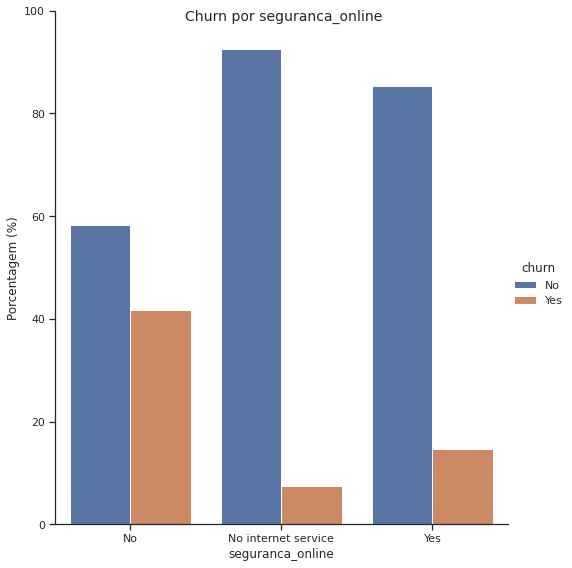

In [22]:
plot_catplot(data, 'seguranca_online')

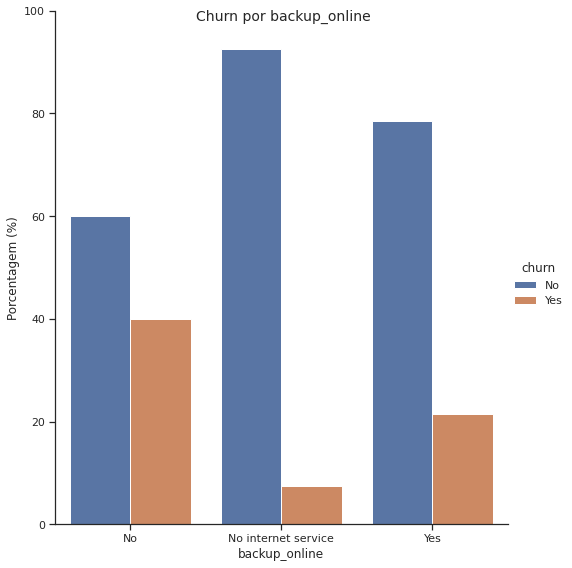

In [23]:
plot_catplot(data, 'backup_online')

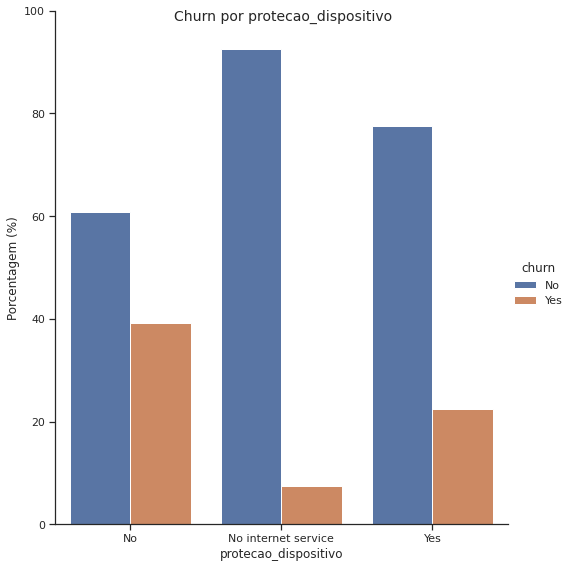

In [24]:
plot_catplot(data, 'protecao_dispositivo')

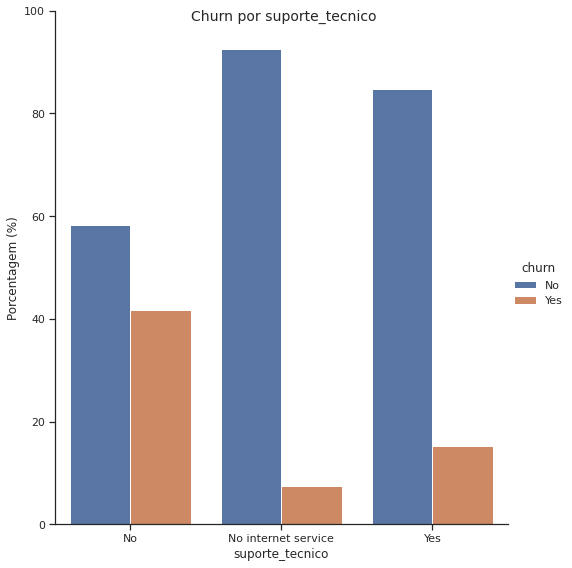

In [25]:
plot_catplot(data, 'suporte_tecnico')

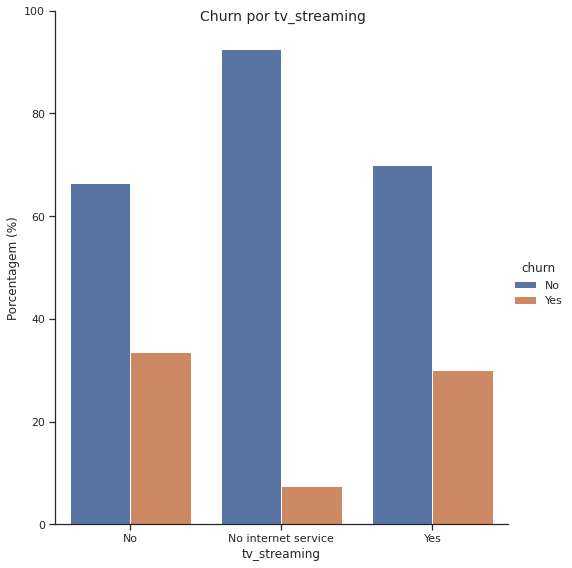

In [26]:
plot_catplot(data, 'tv_streaming')

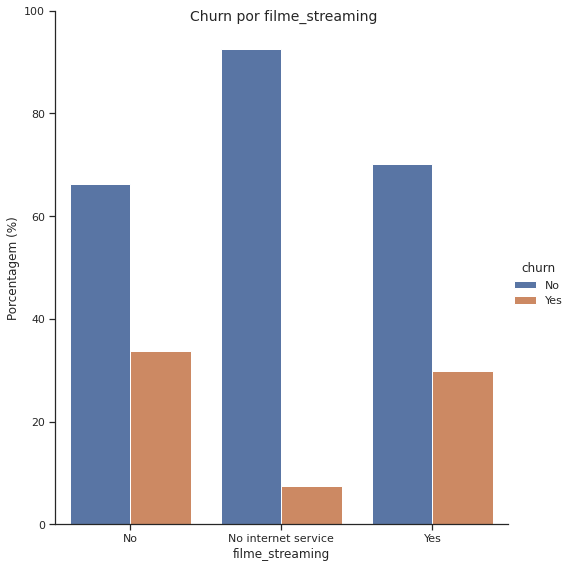

In [27]:
plot_catplot(data, 'filme_streaming')

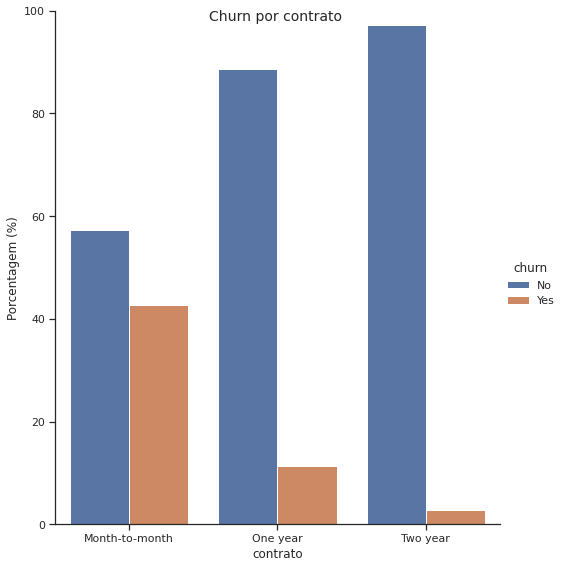

In [28]:
plot_catplot(data, 'contrato')

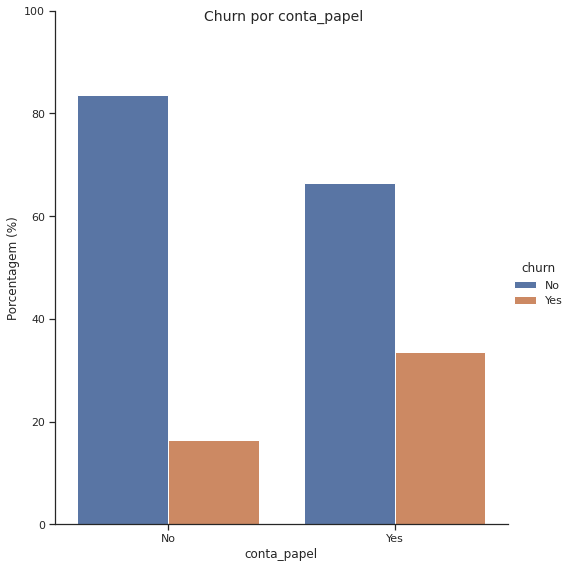

In [29]:
plot_catplot(data, 'conta_papel')

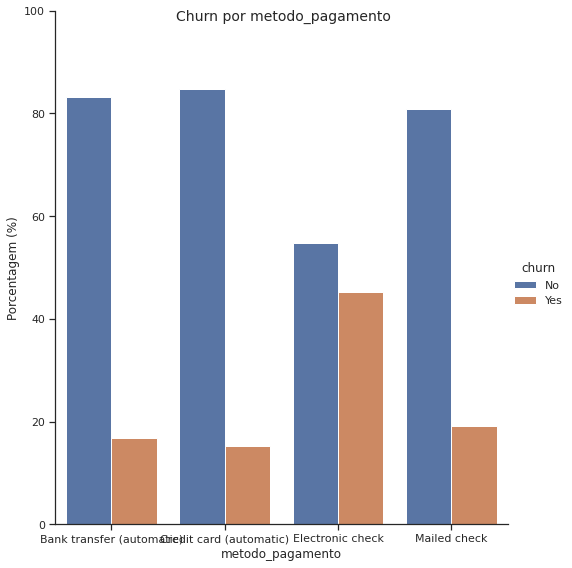

In [30]:
plot_catplot(data, 'metodo_pagamento')

In [31]:
multiplas_linhas_dummies = pd.get_dummies(data.multiplas_linhas, prefix = 'multiplas_linhas', prefix_sep = '_')
servico_internet_dummies = pd.get_dummies(data.servico_internet, prefix = 'servico_internet', prefix_sep = '_')
seguranca_online_dummies = pd.get_dummies(data.seguranca_online, prefix = 'seguranca_online', prefix_sep = '_')
backup_online_dummies = pd.get_dummies(data.backup_online, prefix = 'backup_online', prefix_sep = '_')
protecao_dispositivo_dummies = pd.get_dummies(data.protecao_dispositivo, prefix = 'protecao_dispositivo', prefix_sep = '_')
suporte_tecnico_dummies = pd.get_dummies(data.suporte_tecnico, prefix = 'suporte_tecnico', prefix_sep = '_')
tv_streaming_dummies = pd.get_dummies(data.tv_streaming, prefix = 'tv_streaming', prefix_sep = '_')
filme_streaming_dummies = pd.get_dummies(data.filme_streaming, prefix = 'filme_streaming', prefix_sep = '_')
contrato_dummies = pd.get_dummies(data.contrato, prefix = 'contrato', prefix_sep = '_')
metodo_pagamento_dummies = pd.get_dummies(data.metodo_pagamento, prefix = 'metodo_pagamento', prefix_sep = '_')

In [32]:
data.drop(['id', 'multiplas_linhas', 'servico_internet', 'seguranca_online', 'backup_online', 'protecao_dispositivo', 'suporte_tecnico', 'tv_streaming', 'filme_streaming', 'contrato', 'metodo_pagamento'], axis = 1, inplace = True)

data.head()

,churn,genero,idoso,parceiro,dependente,permanencia,servico_telefonico,conta_papel,mensal,total
0,No,Female,No,Yes,Yes,9,Yes,Yes,65.6,593.30
1,No,Male,No,No,No,9,Yes,No,59.9,542.40
2,Yes,Male,No,No,No,4,Yes,Yes,73.9,280.85
3,Yes,Male,Yes,Yes,No,13,Yes,Yes,98.0,1237.85
4,Yes,Female,Yes,Yes,No,3,Yes,Yes,83.9,267.40


In [33]:
data_complete = pd.concat([data, multiplas_linhas_dummies, servico_internet_dummies, seguranca_online_dummies, backup_online_dummies, protecao_dispositivo_dummies,
                                 suporte_tecnico_dummies, tv_streaming_dummies, filme_streaming_dummies, contrato_dummies, metodo_pagamento_dummies], axis = 1)

data_complete.head()

,churn,genero,idoso,parceiro,dependente,permanencia,servico_telefonico,conta_papel,mensal,total,multiplas_linhas_No,multiplas_linhas_No phone service,multiplas_linhas_Yes,servico_internet_DSL,servico_internet_Fiber optic,servico_internet_No,seguranca_online_No,seguranca_online_No internet service,seguranca_online_Yes,backup_online_No,backup_online_No internet service,backup_online_Yes,protecao_dispositivo_No,protecao_dispositivo_No internet service,protecao_dispositivo_Yes,suporte_tecnico_No,suporte_tecnico_No internet service,suporte_tecnico_Yes,tv_streaming_No,tv_streaming_No internet service,tv_streaming_Yes,filme_streaming_No,filme_streaming_No internet service,filme_streaming_Yes,contrato_Month-to-month,contrato_One year,contrato_Two year,metodo_pagamento_Bank transfer (automatic),metodo_pagamento_Credit card (automatic),metodo_pagamento_Electronic check,metodo_pagamento_Mailed check
0,No,Female,No,Yes,Yes,9,Yes,Yes,65.6,593.30,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,1
1,No,Male,No,No,No,9,Yes,No,59.9,542.40,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1
2,Yes,Male,No,No,No,4,Yes,Yes,73.9,280.85,1,0,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0
3,Yes,Male,Yes,Yes,No,13,Yes,Yes,98.0,1237.85,1,0,0,0,1,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0
4,Yes,Female,Yes,Yes,No,3,Yes,Yes,83.9,267.40,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,0,1


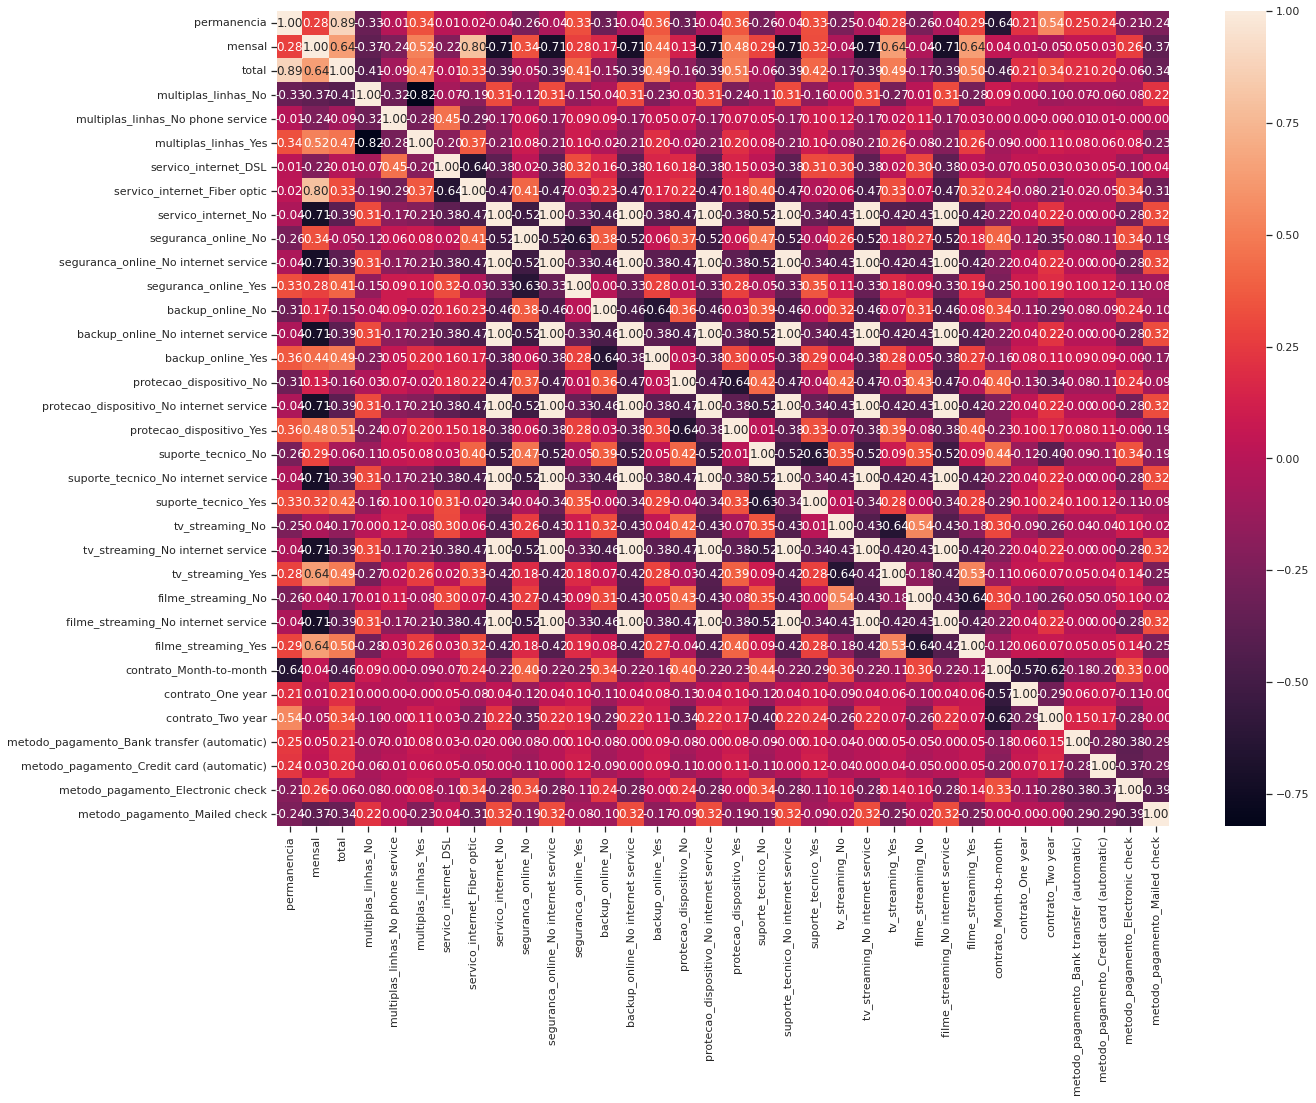

In [34]:
plt.figure(figsize = (20, 15))

sns.heatmap(data_complete.corr('spearman'), annot = True, fmt = '.2f')

plt.show()

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [36]:
x = data_complete.iloc[:, 1:]
y = data_complete.churn

In [37]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.7)

In [38]:
scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

ValueError: ignored

In [ ]:
model = LogisticRegression()

In [ ]:
model.fit(x_train, y_train)

In [ ]:
model.predict(x_test)

In [ ]:
data.churn.value_counts(normalize = True)

In [ ]:
data.head()

In [ ]:
pd.concat([data.churn.value_counts().to_frame(), data.churn.value_counts(normalize = True).to_frame()], axis = 1).set_axis(['churn', 'churn_rate'], axis = 1)

In [ ]:
data.loc[:, ['churn', 'permanencia', 'mensal']].groupby('churn').agg({
    'permanencia': 'count',
    'mensal': lambda x: x.mean()
})

In [ ]:
pd.pivot_table(columns = 'churn', index = 'servico_internet', values = 'mensal', data = data).round(2)

In [ ]:
pd.crosstab(data.churn, data.idoso, normalize = True)

In [ ]:
pd.pivot_table(index = data.churn, data = data)

In [ ]:
data.groupby('churn').mean()

In [ ]:
plt.figure(figsize = (26, 17))
for position, column in enumerate(target_column):
    plt.subplot(3, 5, position + 1)
    plot_bar(data, column)

plt.tight_layout()